In [34]:
%run util.py

# Van der Pol Oscillator

ODE

$$
\begin{align}
x' &= y \\
y' &= -x + \mu (1-x^2)y
\end{align}
$$

In [36]:
mu = 2.0

In [37]:
def dX_dt(X, t=0):
    return np.array([X[1],
                     -X[0] + mu*X[1]*(1-X[0]**2) ])

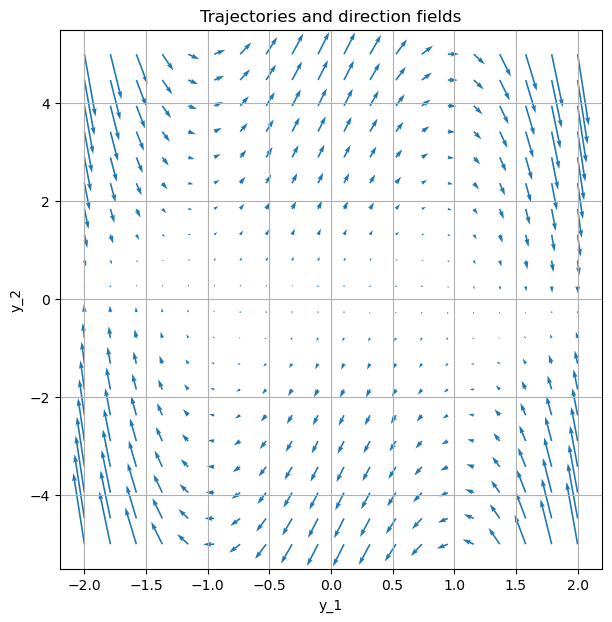

In [38]:
vField(-2, 2, -5, 5, dX_dt, Norm = False)

In [39]:
tmax = 50
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [0., 0.1], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$y$')

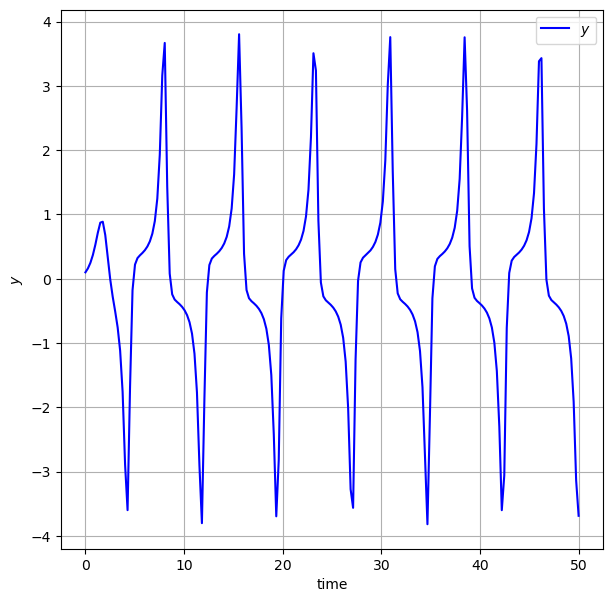

In [52]:
y1, y2 = X.T

# plt.plot(t, y1, 'r-', label='$x$')
plt.plot(t, y2  , 'b-', label='$y$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$y$')

Below we (try to) plot the limit cycle. Since the system lands in the limit cycle eventually, we just wait some time (which we obtained empirically) and then plot $y_2$ against $y_1$.

We observe areas where the signal rapidly changes (few points plotted) for $|y| > 1$ and areas where the signal changes very slowly (many points plotted) for $|y|<1$.

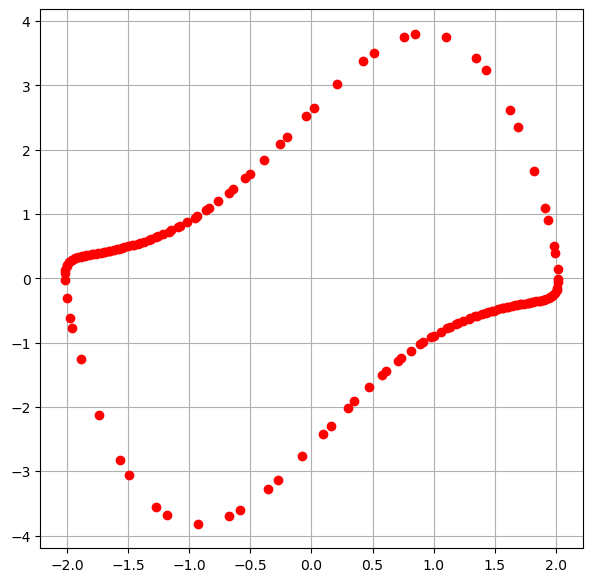

In [54]:
plt.plot(y1[50:], y2[50:], 'ro')
plt.grid(True)

To illustrate this better, we cobine the plot above with a contour plot of the **absolute** change; ie $\sqrt{x'^2 + y'^2}$. We observe that the fast-changing areas of the $y_1 - y_2$ plot coincide with areas of large absolute change, whereas the slow-changes areas conincide with areas of small absolute changes which confirms the intuition.

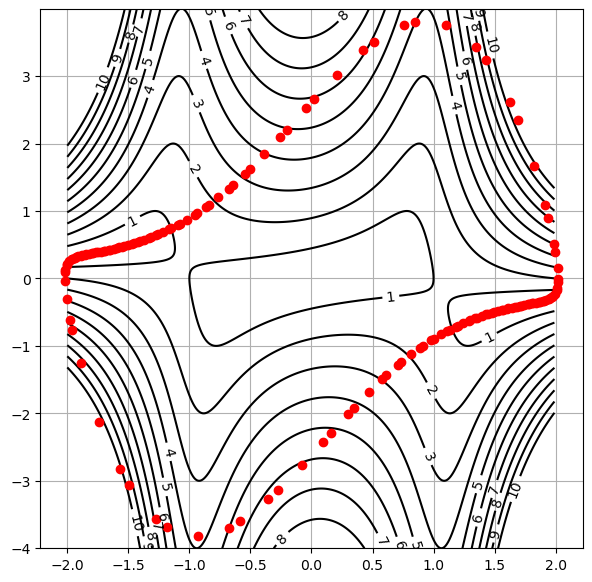

In [127]:
delta = 0.01
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-4.0, 4.0, delta)
X, Y = np.meshgrid(x, y)

Z = np.sqrt(Y**2 + (-X + mu*(1 - X**2)*Y)**2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.linspace(0,10,11), colors='k')
ax.clabel(CS, inline=True)
ax.grid(True)
ax.plot(y1[50:], y2[50:], 'ro')

The Jacboi matrix is given by

$$
J = \begin{pmatrix} 0 & 1 \\ -1 & \mu \end{pmatrix}
$$

The eigenvalues are $(0 - \lambda)(\mu - \lambda) + 1 = 0$ from which follows

$$
\lambda_{1,2} = \frac{\mu}{2} \pm \sqrt{\frac{\mu^2}{4} - 1}
$$

For $\mu > 0$, the fixed point is stable

In [59]:
A = np.array([[0., 1.], [-1., mu]])
lin.eig(A)

(array([1.00000001+0.j, 0.99999999+0.j]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))